In [1]:
import pandas as pd

In [3]:
trumpdf=pd.read_csv('hashtag_donaldtrump.csv',lineterminator='\n')

In [4]:
trumpdf.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


<Axes: >

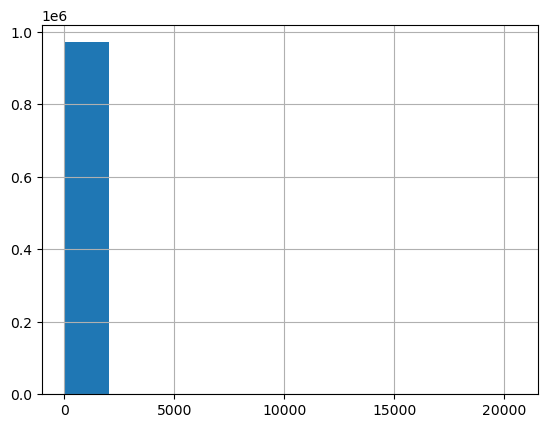

In [5]:
# how about retweets as outcome?
trumpdf.retweet_count.hist()

In [11]:
# who are those guys 
trumpdf.query('retweet_count>5000').groupby(by=['user_name']).retweet_count.max()

user_name
Alana Stewart            5324.0
Jeff Paul                8731.0
Joe Lycett               6272.0
John Handem Piette      20491.0
Laurie Garrett           5135.0
Paula Reid               5986.0
Skillset Magazine       12181.0
Terrence K. Williams     9572.0
🇺🇸🦅M💥A💥G💥A🦅🇺🇲            6850.0
Name: retweet_count, dtype: float64

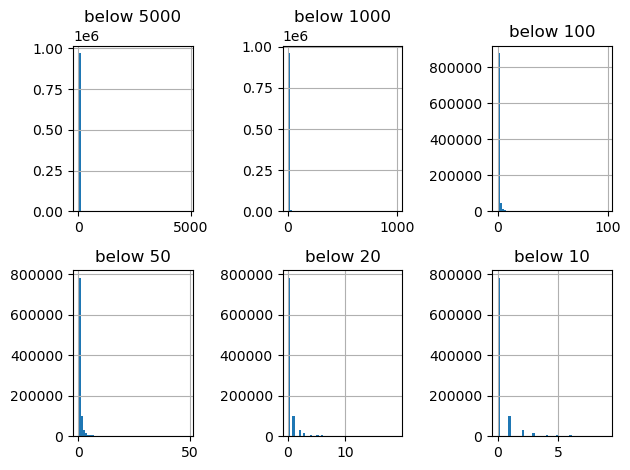

In [27]:
# anway see what dist below that is like
import matplotlib.pyplot as plt
lims=[[5000,1000,100],[50,20,10]]
fig, axs = plt.subplots(2, 3)
for i in range(len(lims)):
    for j in range(len(lims[i])):
        #print( "    Getting number: ", axs[i,j])
        trumpdf.query('retweet_count<'+str(lims[i][j])).retweet_count.hist(bins=50,ax=axs[i,j])
        axs[i,j].set_title(f'below {lims[i][j]}')
fig.tight_layout()
plt.show()        

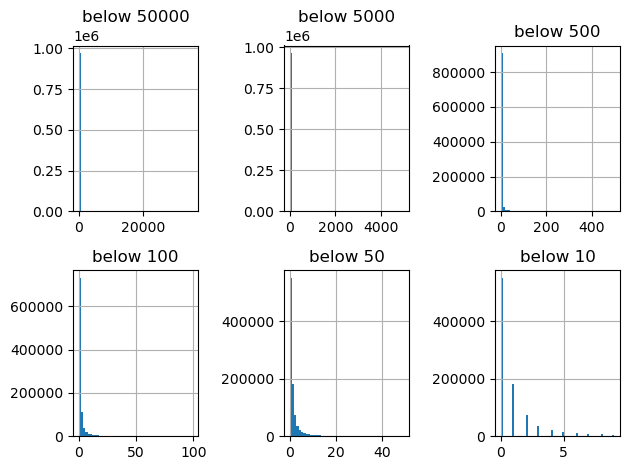

In [28]:
# not so promising. maybe likes are more interesting?
import matplotlib.pyplot as plt
lims=[[50000,5000,500],[100,50,10]]
fig, axs = plt.subplots(2, 3)
for i in range(len(lims)):
    for j in range(len(lims[i])):
        #print( "    Getting number: ", axs[i,j])
        trumpdf.query('likes<'+str(lims[i][j])).likes.hist(bins=50,ax=axs[i,j])
        axs[i,j].set_title(f'below {lims[i][j]}')
fig.tight_layout()
plt.show() 

In [29]:
# yes I think so.  again, with the outliers:
trumpdf.query('likes>5000').groupby(by=['user_name']).likes.max()

user_name
ANI                                 5846.0
AajTak                              6383.0
Akash Banerjee                      9414.0
Alana Stewart                      14420.0
Alvise Pérez                        5722.0
Ashish Chanchlani                  13245.0
Barış Yarkadaş                      8879.0
Bᴜʟᴇɴᴛ Tᴏᴘʀᴀᴋʟɪ 🇹🇷                  7800.0
Can Dündar                          8045.0
Debra Messing✍🏻                     6431.0
Deepak Chaurasia                    9997.0
Höcke Watch                         5115.0
Izabel Oliveira 🦋🌊                  6343.0
Jean-Luc Mélenchon                  5042.0
Jeff Paul                          22036.0
Joe Lycett                          7653.0
John Daly                           8582.0
John Handem Piette                 74084.0
John King                          12179.0
Karen Bryant                        7121.0
Laurie Garrett                     14290.0
Lisa Boothe                         5860.0
MARK SIMONE                         7347.0
M

In [32]:
# recognise Melenchon along with Joe Lycett. John Daly the golfer?
# anyway, lets pick take 20 as our limit
lim=trumpdf.query('likes<=20').shape[0]
tot=trumpdf.shape[0]
print(f"excluding {tot-lim} out of {tot} (leaving {((lim)/tot)*100:.1f}%)")

excluding 35339 out of 970919 (leaving 96.4%)


In [64]:
# start small
sampdf=trumpdf.query('likes<=20').sample(n=10000)

In [131]:
import nltk
#nltk.set_proxy('http://proxyjdm:9090', ('jc001', 'Airplanes30'))
#nltk.download()
#from nltk.corpus import stopwords
# do some cleaning
import re
def rmhand(s):
    return re.sub('@[^\s]*','',s)
def rmurl(s):
    return re.sub('https://[^\s]*','',s)
def rmtags(s):
    return re.sub('#','',s)
def clean_tweets(s):
    s=s.apply( rmhand )
    s=s.apply(rmurl)
    s=s.apply(rmtags)
    s=s.apply(lambda x:x.lower())
    return s
# nltk
# stop_words = set(stopwords.words('english'))
# def tokenisestr(s):
#     tweet_tokens = nltk.word_tokenize(s)
#     return [word for word in tweet_tokens if word not in stop_words]
# def tokenise(s):
#     s=s.apply(tokenisestr)
#     return s

test=pd.Series(['xxx @yz zzz','start https://spug end'])
clean_tweets(test)


0      xxx  zzz
1    start  end
dtype: object

In [132]:
sampdf.tweet=clean_tweets(sampdf.tweet)

In [133]:
sampdf.tweet

824836    gretathunberg se moque de donaldtrump en copia...
683139      schwurbel dir den wahlbetrug ruhig schön.. a...
741119     would have loved for you to have asked  what ...
417659    177,000 ppl watched trump on rightsidebroadcas...
899734    just a selection of the criminal and civil leg...
                                ...                        
734413     claims that there is corruption in several st...
48511       to drown out his bs ‘speech’\n\nwhen he lose...
42302      too bad you're not fighting for the american ...
121866     this is like every other time the guy speaks,...
346620               why are trump’s ladies all stepfords? 
Name: tweet, Length: 10000, dtype: object

In [116]:
# still very messy i.e. emoji, non ascii, non english
# hey ho, see how it go
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer().fit(sampdf.tweet)
print(f"size {len(vect.vocabulary_)}")
bag_of_words = vect.transform(sampdf.tweet)
print("bag_of_words: {}".format(repr(bag_of_words)))
feature_names = vect.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
# use em
X = bag_of_words # vect.transform(sampdf.tweet)
y =  sampdf.likes
print("X_train:\n{}".format(repr(X)))

size 31955
bag_of_words: <10000x31955 sparse matrix of type '<class 'numpy.int64'>'
	with 191665 stored elements in Compressed Sparse Row format>
Number of features: 31955
First 20 features:
['00' '000' '000s' '004' '00pm' '01' '0100' '019' '01pm' '02' '0206575286'
 '03' '0360' '04' '05' '052' '054' '055' '0553664724' '06']
X_train:
<10000x31955 sparse matrix of type '<class 'numpy.int64'>'
	with 191665 stored elements in Compressed Sparse Row format>


In [117]:
# rescale with tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(min_df=5, norm=None).fit(sampdf.tweet)
X = vectorizer.transform(sampdf.tweet)
# find maximum value for each of the features over dataset:
max_value = X.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names_out())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['electionresults2020' 'trumpmeltdown' 'trumpislosing' 'bidenharris'
 'also' 'kamalaharris' '2020election' 'may' 'donaldtrump' 'already'
 'thing' 'trump2020tosaveamerica' 'himself' 'tweet'
 'presidentialdebate2020' 'uselections' 'kag' 'night' 'trump2020landslide'
 'actually']
Features with highest tfidf: 
['me' 'follow' 'extra' 'les' 'pray' 'je' 'ole' 'allah' 'support' 'soit'
 'logo' 'everyone' 'به' 'cheats' 'kag2020' 'twittercensorship' 'gt' 'fuck'
 'hey' 'nah']


In [122]:
# quick fit
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scores = cross_val_score(LogisticRegression(max_iter=500), X_train, y_train, cv=5,scoring='neg_mean_squared_error')
print("Mean cross-validation score: {:.2f}".format(np.mean(scores)))

Mean cross-validation score: -9.41


C:\Users\jc001\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\jc001\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'actual')

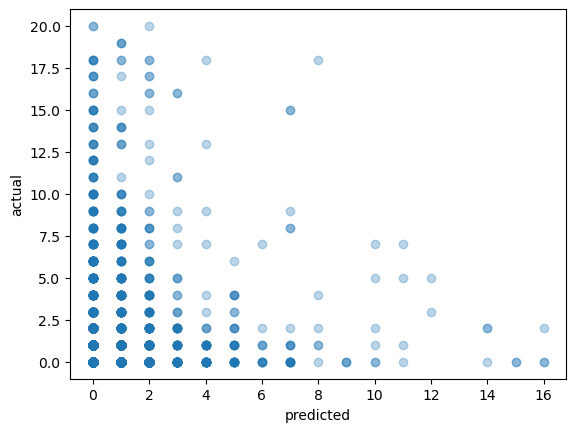

In [119]:
model=LogisticRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)
plt.scatter(y_pred,y_test,alpha=0.3)
plt.xlabel('predicted')
plt.ylabel('actual')

Text(0, 0.5, 'actual')

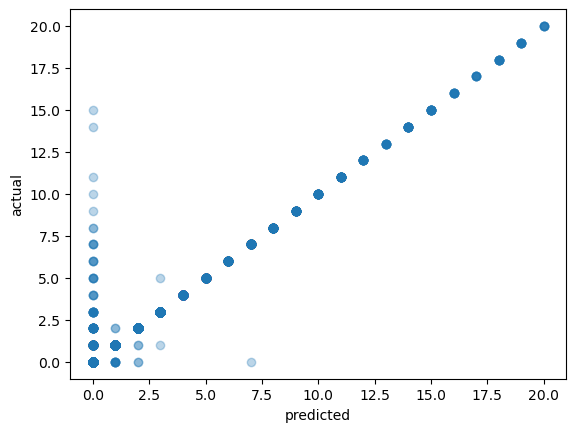

In [97]:
# not great. is our training even fit ?
y_pred_train=model.predict(X_train)
plt.scatter(y_pred_train,y_train,alpha=0.3)
plt.xlabel('predicted')
plt.ylabel('actual')

r2 = -5.032368166670605


Text(0, 0.5, 'actual')

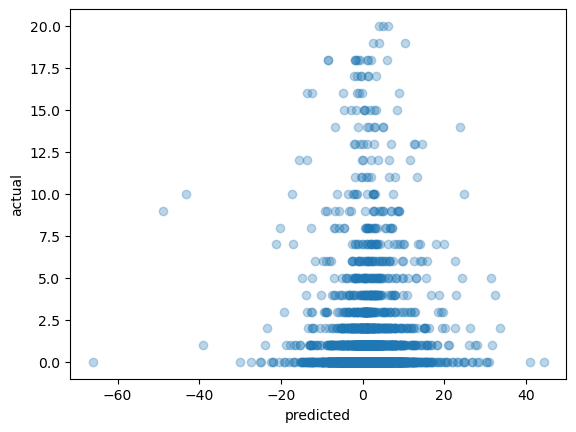

In [111]:
# yuck.  try simple linear (since outcome is actually continuous rather than categorical)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.linear_model as lm
model=lm.LinearRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f'r2 = {r2_score(y_test,y_pred)}')
plt.scatter(y_pred,y_test,alpha=0.3)
plt.xlabel('predicted')
plt.ylabel('actual')

In [83]:
# not great. lets throw in tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(min_df=5, norm=None).fit(sampdf.tweet)
X = vectorizer.transform(sampdf.tweet)
# find maximum value for each of the features over dataset:
max_value = X.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names_out())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['electionresults2020' 'trumpmeltdown' 'trumpislosing' 'bidenharris'
 'also' 'kamalaharris' '2020election' 'may' 'donaldtrump' 'already'
 'thing' 'trump2020tosaveamerica' 'trump2020landslide' 'himself'
 'presidentialdebate2020' 'tweet' 'kag' 'uselections' 'night'
 'trumpcrimefamily']
Features with highest tfidf: 
['me' 'follow' 'extra' 'les' 'pray' 'je' 'ole' 'allah' 'support' 'soit'
 'logo' 'everyone' 'به' 'cheats' 'kag2020' 'twittercensorship' 'gt' 'fuck'
 'hey' 'nah']


Text(0, 0.5, 'actual')

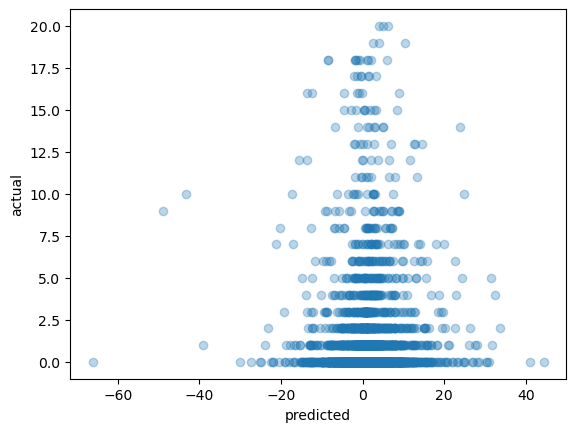

In [85]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model=LinearRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)
plt.scatter(y_pred,y_test,alpha=0.3)
plt.xlabel('predicted')
plt.ylabel('actual')

In [109]:
import sklearn.svm as svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model=svm.SVR().fit(X_train,y_train)
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)
plt.scatter(y_pred,y_test,alpha=0.3)
plt.xlabel('predicted')
plt.ylabel('actual')

NameError: name 'mean_squared_error' is not defined

Text(0, 0.5, 'actual')

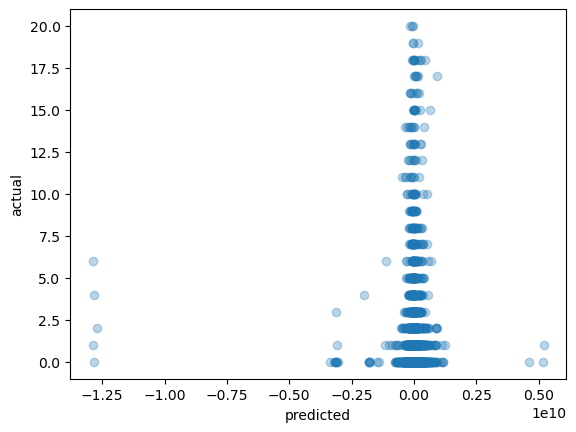

In [90]:
# final throw of the dice https://stackoverflow.com/questions/15087322/how-to-predict-a-continuous-value-time-from-text-documents
from sklearn.linear_model import SGDRegressor
vectorizer=TfidfVectorizer(min_df=5, norm=None).fit(sampdf.tweet)
X = vectorizer.transform(sampdf.tweet)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model=SGDRegressor().fit(X_train,y_train)
y_pred=model.predict(X_test)
plt.scatter(y_pred,y_test,alpha=0.3)
plt.xlabel('predicted')
plt.ylabel('actual')

# Goodbye continuous! Hello classification!